## 14.4 Homework
- 1, Import the visual package in python to make an animation on the screen of the position of the particle in Brownian motion.

In [1]:
%matplotlib inline
# Brownian Motion
import numpy as np
import matplotlib.pyplot as plt
# init
L1 = 101
L2 = 101
N = 10000

position = np.empty([N,2]) 
position[0,0] = int(L1/2)
position[0,1] = int(L2/2)
direction = np.array([[0,1],[0,-1],[1,0],[-1,0]])

# random walk
for i in range(1,N):
    position1 = [-1,-1]
    while min(position1)<0 or position1[0] >L1 or position1[1] >L2:
        move = np.random.randint(len(direction))
        position1 = position[i-1,:] + direction[move]
        
    position[i,:] = position1


## The visualization below takes about 5 minutes to finish.
### It seems that I need to fix the positioning of the wall surrounding the 2 dimensional space, the particle overlaps it.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

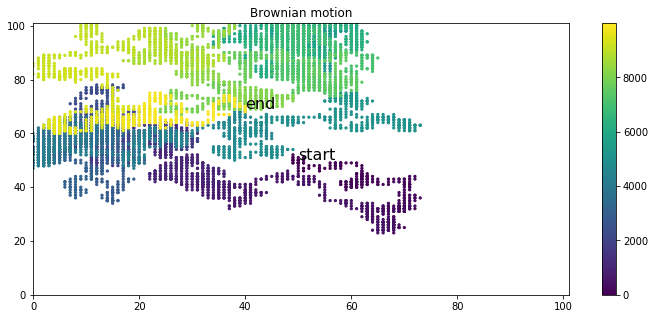

<IPython.core.display.Javascript object>

takes about 332.18565106391907 seconds to complete


In [3]:
from vpython import *
import time

plt.figure(figsize=[12, 5])
plt.xlim(0,101)
plt.ylim(0,101)
plt.title('Brownian motion')
plt.scatter(position[:,0], position[:,1], c=range(N), s=5)
plt.text(position[0,0], position[0,1], 'start', fontsize=16)
plt.text(position[-1,0], position[-1,1], 'end', fontsize=16)

plt.colorbar()
plt.show()

scene2 = canvas(title='Brownian Motion',
     center=vector(int(L1/2),int(L1/2),0), background=color.black)
redbox = box(pos=vector(int(L1/2),int(L1/2),0),size=vector(101,101,0),color=color.red,opacity=0.5)
distant_light(direction=vector(int(L1/2),int(L1/2),0), color=color.yellow)
wallL = box(pos=vector(0,int(L1/2),0), size=vector(1,101,0), color=color.green,opacity=1) 
wallR = box(pos=vector(int(L1),int(L1/2),0), size=vector(1,101,0), color=color.green,opacity=1) 
wallU = box(pos=vector(int(L1/2),int(L1),0), size=vector(101,1,0), color=color.green,opacity=1) 
wallD = box(pos=vector(int(L1/2),0,0), size=vector(101,1,0), color=color.green,opacity=1) 
blueball = sphere(pos=vector(int(L1/2),int(L1/2),0),size=vector(1,1,0),color=color.cyan,opacity=1)
t = 0

t1 = time.time()
while t < len(position):
    sleep(0.0001)
    blueball.pos = vector(int(position[t][0]),int(position[t][1]),1)
    t += 1

t2 = time.time()
print('takes', t2-t1, 'seconds to complete')


- 2, rewrite the radioactive decay, to generate 1000 random numbers following the non-uniformed distribution.

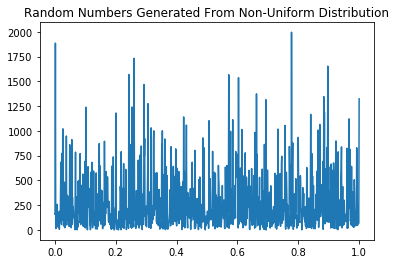

In [7]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

tau = 3.053*60

N_atom = 1000   #1000 Tl atoms
N_time = 1000   #1000 seconds
mu = np.log(2)/tau
N_Pb = np.zeros([N_time-1])  #the array to store the number of decayed atoms in each time step 
N_Tl = N_atom * np.ones([N_time-1])  #the array to store the number of decayed atoms in each time step 

x = []
for i in range(N_atom):    
    z0 = np.random.random()
    x0 = int(-np.log(1-z0)/mu) #the time to decay from random number
    x.append(x0)
    if x0<N_time:     
        N_Pb[x0:] += 1  #after decay, we need to count 1 from now on
        N_Tl[x0:] -= 1  #after decay, we need to count 1 from now on
        
plt.title('Random Numbers Generated From Non-Uniform Distribution')
plt.plot(np.linspace(0,1,1000),x)
plt.show()

